# BBM 409 - Introduction to Machine Learning Lab. 

## Assignment 2

### Name- Surname: Mehmet Emin TUNCER
### Studen Number : 21591022







# Part I: Theory Questions




## MLE

#### 2 Fill the blanks with T (True) or F (False) for the statements given above:

• Maximum likelihood estimation provides not only point estimation, but a distribution information of the parameters estimated. ( **True** ) 

• Maximum likelihood and Bayesian approachs for parameter estimation perform well with low-dimensional dataset with many training examples while their performance is bad on high-dimensional dataset with few training examples. ( **True** )



## Naive Bayes


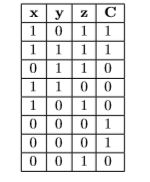



#### 1. Consider that you are given the dataset in the table above consisting of boolean variables x, y and z and a single boolean output variable C. Suppose that the Naive Bayes classiﬁer is going to be used. 

    • Specify the value of P(C = 1|x = 1,y = 1,z = 0). Show your solution step by step. 

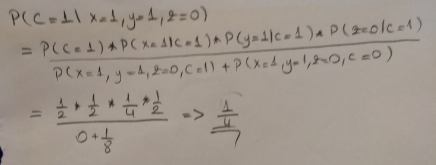

    
    
    
    
    • Specify the value of P(C = 0|x = 1,y = 1). Show your solution step by step.

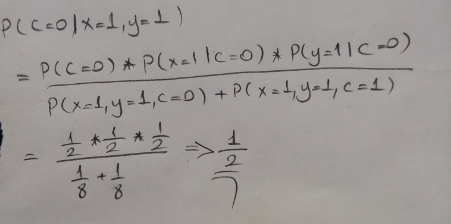

**Suppose that the Joint Naive Bayes classiﬁer is used for the options below**

    • Specify the value of P(C = 1|x = 1,y = 1,z = 0). Show your solution step by step. 

        Assume N(x) is the number of records that matching in the data table. Then the solution is:

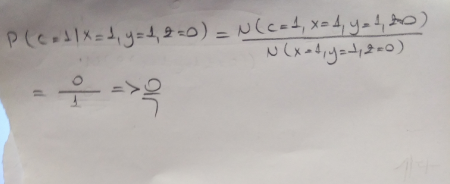

    • Specify the value of P(C = 0|x = 1,y = 1). Show your solution step by step. 

        Assume N(x) is the number of records that matching in the data table. Then the solution is:

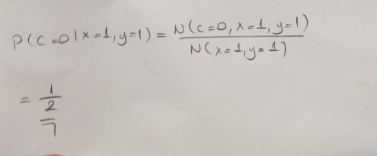

#### 2. Assume that you have three variables, which are A, B and C. 

    • Suppose that you have the following informations P(C|A) = 0.7 and P(C|B) = 0.4. State that whether you can compute P(C|A,B) with the informations given previously or not. Besides show your solution if you can and explain the reason if you can not. 

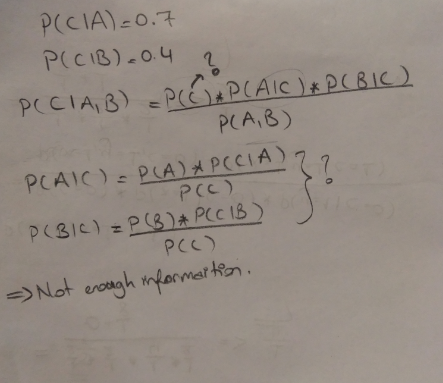

    • Suppose that besides two informations above, P(A) = 0.3 and P(B) = 0.5 informations are given. State that whether you can compute P(C|A,B) with the informations given previously or not. Besides show your solution if you can and explain the reason if you can not. 

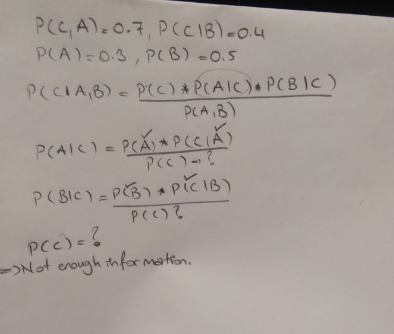

    • Finally assume that you have only informations, which are P(C,A) = 0.2, P(A) = 0.3 and P(B) = 1. State that whether you can compute P(C|A,B) with the informations given previously or not. Besides show your solution if you can and explain the reason if you can not.
    


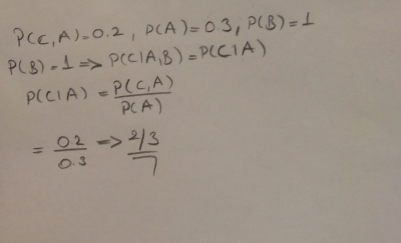

# PART II: Detection of Fake News


In [493]:
import numpy as np
import pandas as pd
import re
import six
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import operator
import math

count_for = 0


class Word:
    name = ''
    count = 0
    


In [494]:
def create_wordsFreq_Dict(freq_Dict, dataframe, words_list, class_list):
    for word in words_list:
        words = Word()
        words.name = word
        words.count = dataframe.loc[word].frequency
        class_list.append(words)
        freq_Dict[word] = dataframe.loc[word].frequency

                
        
def createFreqDataFrame(dataFrame, column, range,classList,freqDict,wordList):
    word_vectorizer= CountVectorizer(analyzer='word',ngram_range=(range,range),stop_words='english', lowercase=True)
    sparse_matrix = word_vectorizer.fit_transform(dataFrame[column].apply(lambda x: np.str_(x)))
    frequencies_title_UG = sum(sparse_matrix).toarray()[0]
    freq_DF= pd.DataFrame(frequencies_title_UG, index=word_vectorizer.get_feature_names(),
                                         columns=['frequency'])

    for x in word_vectorizer.get_feature_names():
        wordList.append(x)

    create_wordsFreq_Dict(freqDict,freq_DF,wordList,classList)


    
    
def findTotalWords(dict1):
    x=0
    for key in dict1:
        x=x+dict1[key]
    return x

def predict_the_news(news_test,index,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict, number_of_realNews, number_of_fakeNews,
                     total_real_words, total_fake_words,column):
    predictValue = 0
    total_news = number_of_realNews + number_of_fakeNews
    predictData = news_test.iloc[index]
    word_list = str(predictData[column]).split()
    for w in word_list:
        if w in ENGLISH_STOP_WORDS:
            
            word_list.remove(w)
            
    
    
    
    if len(word_list)==0:
        predictValue = 1

        if (predictValue == predictData['label']):

            return 1

        else:
            return 0
        
    
    
    else:
        
    
        if predictData.iloc[1] != 'NAN' and len(word_list) !=1 :
            try:
                testDict={}
                word_vectorizer= CountVectorizer(analyzer='word',ngram_range=(range1,range1),stop_words='english', lowercase=True)
                sparse_matrix = word_vectorizer.fit_transform(word_list)
                frequencies = sum(sparse_matrix).toarray()[0]
                freq_DF = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

                for w in word_vectorizer.get_feature_names():
                    testDict[w] = freq_DF.loc[w].frequency

                real_predict_value=findPredictValue(testDict,real_WordsFreq_Dict,total_real_words,number_of_realNews,total_news)
                fake_predict_value=findPredictValue(testDict,fake_WordsFreq_Dict,total_fake_words,number_of_fakeNews,total_news)

                #print(real_predict_value)
                #print(fake_predict_value)

                if (real_predict_value > fake_predict_value):
                    predictValue = 0

                    if (predictValue == predictData['label']):

                        #print("My predict is true")
                        return 1

                    else:
                        #print("My predict is false")
                        return 0
                else:
                    predictValue = 1

                    if (predictValue == predictData['label']):
                        #print("My predict is true")
                        return 1

                    else:
                        #print("My predict is false")
                        return 0

            except ValueError:
                predictValue = 1

                if (predictValue == predictData['label']):

                    return 1

                else:
                    return 0

        else:
            predictValue = 1

            if (predictValue == predictData['label']):

                return 1

            else:
                return 0

            
            
def predict_the_newsSTOP(news_test,index,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict, number_of_realNews, number_of_fakeNews,
                     total_real_words, total_fake_words,column):
    predictValue = 0
    total_news = number_of_realNews + number_of_fakeNews
    predictData = news_test.iloc[index]
    word_list = str(predictData[column]).split()
    for w in word_list:
        if w in ENGLISH_STOP_WORDS:
            
            word_list.remove(w)
            
    
    
    
    if len(word_list)==0:
        predictValue = 1

        if (predictValue == predictData['label']):

            return 1

        else:
            return 0
        
    
    
    else:
        
    
        if predictData.iloc[1] != 'NAN' and len(word_list) !=1 :
            testDict={}
            word_vectorizer= CountVectorizer(analyzer='word',ngram_range=(range1,range1), lowercase=True)
            sparse_matrix = word_vectorizer.fit_transform(word_list)
            frequencies = sum(sparse_matrix).toarray()[0]
            freq_DF = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

            for w in word_vectorizer.get_feature_names():
                testDict[w] = freq_DF.loc[w].frequency

            real_predict_value=findPredictValue(testDict,real_WordsFreq_Dict,total_real_words,number_of_realNews,total_news)
            fake_predict_value=findPredictValue(testDict,fake_WordsFreq_Dict,total_fake_words,number_of_fakeNews,total_news)

            #print(real_predict_value)
            #print(fake_predict_value)

            if (real_predict_value > fake_predict_value):
                predictValue = 0

                if (predictValue == predictData['label']):

                    #print("My predict is true")
                    return 1

                else:
                    #print("My predict is false")
                    return 0
            else:
                predictValue = 1

                if (predictValue == predictData['label']):
                    #print("My predict is true")
                    return 1

                else:
                    #print("My predict is false")
                    return 0



        else:
            predictValue = 1

            if (predictValue == predictData['label']):

                return 1

            else:
                return             
def findPredictValue(testDict,WordsFreq_Dict,total_number_words,number_of_News,total_news):
    predict_value = 0
    # predict_value=1

    for key in testDict:
        if key in WordsFreq_Dict:
            predict_value1 = (WordsFreq_Dict[key] + 1) / (total_number_words + len(WordsFreq_Dict))

            predict_value = predict_value + math.log(predict_value1, 2)

            # predict_value=predict_value*predict_value1

    predict_value = predict_value + math.log((number_of_News / total_news), 2)
    # predict_value=predict_value*(real_or_news_count / total_news_count)
    return predict_value


def findAC(fakeNews_Test,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict, number_of_realNews, number_of_fakeNews,
                     total_real_words, total_fake_words,column):
    countx = 0

    for i in range(fakeNews_Test.shape[0]):
        x = predict_the_news(fakeNews_Test, i,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict,
                             number_of_realNews, number_of_fakeNews,total_real_words, total_fake_words,column)
        if x == 1:
            countx += 1

    """print("Final===>>>" + str(countx))
    print(countx)
    print(fakeNews_Test.shape[0])"""
    Accuracy = (countx / fakeNews_Test.shape[0]) * 100
    return Accuracy

def find_AC_STOP(fakeNews_Test,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict, number_of_realNews, number_of_fakeNews,
                     total_real_words, total_fake_words,column):
    countx = 0

    for i in range(fakeNews_Test.shape[0]):
        x = predict_the_newsSTOP(fakeNews_Test, i,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict,
                             number_of_realNews, number_of_fakeNews,total_real_words, total_fake_words,column)
        if x == 1:
            countx += 1


    Accuracy = (countx / fakeNews_Test.shape[0]) * 100
    return Accuracy

In [495]:
#CREATING THE DATAFRAMES

full_news_DataFrame = pd.read_csv("fake_news_train.csv")

##Shuffle the dataFrame

full_news_DataFrame = full_news_DataFrame.iloc[np.random.permutation(len(full_news_DataFrame))]

#Divide the dataFrame to Real and Fake

split= int((full_news_DataFrame.shape[0] / 100) * 10)

News_Test = full_news_DataFrame.iloc[:split, :]
News_Train = full_news_DataFrame.iloc[split:, :]


realTrainDF = News_Train[News_Train['label'] == 0]
fakeTrainDF = News_Train[News_Train['label'] == 1]

number_of_real_news=realTrainDF.shape[0]
number_of_fake_news=fakeTrainDF.shape[0]

realTrainDF_title=realTrainDF.fillna('memin')
fakeTrainDF_title=fakeTrainDF.fillna('memin')

In [496]:
### Without stopwords, for title

freq_dict_REAL_titleUG={}
REAL_Words_list_titleUG = []
REAL_Class_List_titleUG = []

total_Real_TitleUG=0

createFreqDataFrame(realTrainDF_title,'title',1,REAL_Class_List_titleUG,freq_dict_REAL_titleUG,REAL_Words_list_titleUG)

total_Real_TitleUG=findTotalWords(freq_dict_REAL_titleUG)

freq_dict_FAKE_titleUG={}
FAKE_Words_list_titleUG = []
FAKE_Class_List_titleUG = []

total_Fake_TitleUG=0

createFreqDataFrame(fakeTrainDF_title,'title',1,FAKE_Class_List_titleUG,freq_dict_FAKE_titleUG,FAKE_Words_list_titleUG)

total_Fake_TitleUG=findTotalWords(freq_dict_FAKE_titleUG)



REAL_Class_List_titleUG = sorted(REAL_Class_List_titleUG, key=operator.attrgetter('count'), reverse=True)
FAKE_Class_List_titleUG = sorted(FAKE_Class_List_titleUG, key=operator.attrgetter('count'), reverse=True)




accurrancy_for_titleUG=findAC(News_Test,1,freq_dict_REAL_titleUG,freq_dict_FAKE_titleUG,
                number_of_real_news,number_of_fake_news,total_Real_TitleUG,total_Fake_TitleUG,'title')


print("Accuracy for the title is :\n"+"%"+ str(accurrancy_for_titleUG))




Accuracy for the title is :
%62.5


In [497]:

freq_dict_REAL_titleBG={}
REAL_Words_list_titleBG = []
REAL_Class_List_titleBG = []



createFreqDataFrame(realTrainDF_title,'title',2,REAL_Class_List_titleBG,freq_dict_REAL_titleBG,REAL_Words_list_titleBG)

total_Real_TitleBG=findTotalWords(freq_dict_REAL_titleBG)


freq_dict_FAKE_titleBG={}
FAKE_Words_list_titleBG = []
FAKE_Class_List_titleBG = []



createFreqDataFrame(fakeTrainDF_title,'title',2,FAKE_Class_List_titleBG,freq_dict_FAKE_titleBG,FAKE_Words_list_titleBG)

total_Fake_TitleBG=findTotalWords(freq_dict_FAKE_titleBG)










In [498]:
##Creating data for 'Text' column without stop words

freq_dict_REAL_text={}
REAL_Words_list_text = []
REAL_Class_List_text = []


createFreqDataFrame(realTrainDF_title,'text',1,REAL_Class_List_text,freq_dict_REAL_text,REAL_Words_list_text)

total_Real_text=findTotalWords(freq_dict_REAL_text)

freq_dict_FAKE_text={}
FAKE_Words_list_text = []
FAKE_Class_List_text = []


createFreqDataFrame(realTrainDF_title,'text',1,REAL_Class_List_text,freq_dict_REAL_text,REAL_Words_list_text)

total_Real_text=findTotalWords(freq_dict_REAL_text)


freq_dict_FAKE_text={}
FAKE_Words_list_text = []
FAKE_Class_List_text = []


createFreqDataFrame(fakeTrainDF_title,'text',1,FAKE_Class_List_text,freq_dict_FAKE_text,FAKE_Words_list_text)

total_Fake_text=findTotalWords(freq_dict_FAKE_text)

predict_the_news(News_Test,0,1,freq_dict_REAL_text,freq_dict_FAKE_text,
                number_of_real_news,number_of_fake_news,total_Real_text,total_Fake_text,'text')


accuracy_without_Stop_Words=findAC(News_Test,1,freq_dict_REAL_text,freq_dict_FAKE_text,
                number_of_real_news,number_of_fake_news,total_Real_text,total_Fake_text,'text')

print("Accuracy for the text column without the stop words is\n"+ "%"+ str(accuracy_without_Stop_Words))

Accuracy for the text column without the stop words is
%51.14182692307693


In [499]:
#Creating data for 'Text' column without stop words
realTrainDF_STOP = News_Train[News_Train['label'] == 0]
fakeTrainDF_STOP = News_Train[News_Train['label'] == 1]


realTrainDF_STOP.fillna('memin')
fakeTrainDF_STOP.fillna('memin')


freq_dict_REAL_STOP={}
REAL_Words_list_STOP = []
REAL_Class_List_STOP = []

word_vectorizer= CountVectorizer(analyzer='word', lowercase=True)
sparse_matrix = word_vectorizer.fit_transform(realTrainDF_STOP['text'].apply(lambda x: np.str_(x)))
frequencies_STOP = sum(sparse_matrix).toarray()[0]
freq_DF_REAL_STOP= pd.DataFrame(frequencies_STOP, index=word_vectorizer.get_feature_names(),
                                         columns=['frequency'])


for x in word_vectorizer.get_feature_names():
    REAL_Words_list_STOP.append(x)

create_wordsFreq_Dict(freq_dict_REAL_STOP, freq_DF_REAL_STOP, REAL_Words_list_STOP, REAL_Class_List_STOP)

total_REAL_STOP=findTotalWords(freq_dict_REAL_STOP)

################


freq_dict_FAKE_STOP={}
FAKE_Words_list_STOP = []
FAKE_Class_List_STOP = []

word_vectorizer1= CountVectorizer(analyzer='word', lowercase=True)
sparse_matrix1 = word_vectorizer1.fit_transform(fakeTrainDF_STOP['text'].apply(lambda x: np.str_(x)))
frequencies_STOP1 = sum(sparse_matrix1).toarray()[0]
freq_DF_FAKE_STOP= pd.DataFrame(frequencies_STOP1, index=word_vectorizer1.get_feature_names(),
                                         columns=['frequency'])


for x in word_vectorizer1.get_feature_names():
    FAKE_Words_list_STOP.append(x)
    
    
create_wordsFreq_Dict(freq_dict_FAKE_STOP, freq_DF_FAKE_STOP, FAKE_Words_list_STOP, FAKE_Class_List_STOP)

total_FAKE_STOP=findTotalWords(freq_dict_FAKE_STOP)





accuracy_with_Stop_Words=find_AC_STOP(News_Test,1,freq_dict_REAL_STOP,freq_dict_FAKE_STOP, number_of_real_news, number_of_fake_news,
                     total_REAL_STOP, total_FAKE_STOP,'text')

print("Accuracy for the text column with the stop words is\n"+ "%"+ str(accuracy_with_Stop_Words))



Accuracy for the text column with the stop words is
%50.42067307692307


In [500]:
##PART 1 :  Understanding the data 


FAKE_Class_List_titleUG1=FAKE_Class_List_titleUG[:3] 
print("Top 3 words in Fake News Titles")
for i in FAKE_Class_List_titleUG1:
    print(i.name+ "  ====>>  "+ str(i.count))

    
print("\n-------\n")    
#Top 3 words in Fake News Titles:
REAL_Class_List_titleUG1=REAL_Class_List_titleUG[:3]
print("Top 3 words in Real News Titles")
for i in REAL_Class_List_titleUG1:
    print(i.name+ "  ====>>  "+ str(i.count))

Top 3 words in Fake News Titles
trump  ====>>  1065
hillary  ====>>  744
clinton  ====>>  650

-------

Top 3 words in Real News Titles
new  ====>>  4832
york  ====>>  4587
times  ====>>  4555


In [501]:
##PART 2 Unigram – Bigram 

## I created dictionaries for the Bag of Word wit Unigram – Bigram

print("The dictionary of word counts in Real news(Title column) with Unigram")
print(freq_dict_REAL_titleUG)


The dictionary of word counts in Real news(Title column) with Unigram
{'000': 60, '10': 33, '100': 35, '1000': 2, '100k': 1, '100th': 2, '101': 1, '102': 1, '105': 1, '106': 1, '10th': 1, '11': 27, '110': 2, '1100': 1, '112': 1, '113': 1, '115': 1, '115th': 1, '11th': 1, '12': 7, '120': 2, '124': 1, '13': 16, '130': 1, '134': 1, '135': 1, '137': 1, '14': 6, '140': 1, '147': 1, '15': 17, '150': 4, '156': 1, '15k': 2, '16': 7, '161': 1, '165': 1, '17': 7, '170': 1, '18': 7, '1800s': 1, '188': 1, '19': 5, '190': 1, '1917': 1, '192': 1, '1920': 1, '1933': 1, '1939': 1, '1945': 2, '1964': 1, '1980s': 1, '1981': 1, '1984': 1, '1985': 1, '199': 1, '1b': 13, '1m': 1, '1st': 3, '20': 13, '200': 5, '2000': 1, '2005': 1, '2008': 2, '200k': 1, '2010': 3, '2011': 2, '2012': 1, '2014': 4, '2015': 5, '2016': 43, '2017': 19, '2018': 11, '2020': 8, '2026': 1, '2030': 1, '2049': 1, '20k': 1, '20th': 3, '21': 7, '211': 1, '215': 1, '21st': 3, '22': 5, '221': 1, '225': 1, '227': 1, '23': 2, '24': 7, '24k'

In [502]:
print("The dictionary of word counts of Fake news(Title column) with Unigram")
print(freq_dict_FAKE_titleUG)

The dictionary of word counts of Fake news(Title column) with Unigram
{'000': 55, '004': 1, '00pm': 10, '01': 5, '02': 2, '04': 2, '06': 2, '07': 2, '08': 1, '09': 2, '09l': 1, '10': 72, '100': 24, '1000': 3, '1000lbs': 1, '1000s': 1, '100k': 3, '100mln': 1, '100percentfedup': 7, '100s': 1, '101': 2, '108': 1, '10k': 1, '10m': 1, '10x': 1, '11': 51, '115': 1, '116': 1, '117': 2, '1178': 1, '12': 16, '120': 2, '12000': 1, '1222': 1, '1223': 1, '1224': 1, '1225': 1, '1228': 1, '1229': 1, '1230': 1, '12th': 1, '13': 15, '130': 2, '131': 1, '137': 1, '14': 13, '141': 1, '14th': 1, '15': 26, '150': 2, '1542': 1, '16': 35, '160': 1, '161029': 1, '16yo': 1, '17': 9, '170': 1, '172': 1, '18': 9, '180': 1, '1850': 1, '1851': 1, '1862': 1, '1883': 1, '1897': 1, '1899': 1, '18th': 1, '19': 7, '190': 1, '1920s': 1, '1927': 1, '1933': 1, '1940s': 1, '1945': 1, '1948': 2, '1951': 1, '1956': 1, '1960s': 1, '197': 1, '1970': 2, '1970s': 1, '1975': 1, '1976': 1, '1984': 1, '199': 1, '1990s': 1, '1992':

In [503]:
print("The dictionary of word counts of Real news(Title column) with Bigram")
print(freq_dict_REAL_titleBG)

The dictionary of word counts of Real news(Title column) with Bigram
{'000 000': 2, '000 2016': 1, '000 annually': 2, '000 anti': 1, '000 asylum': 1, '000 athletes': 1, '000 brave': 1, '000 check': 1, '000 christians': 1, '000 colorado': 1, '000 construction': 1, '000 day': 1, '000 employees': 2, '000 evacuate': 1, '000 ex': 1, '000 funding': 1, '000 halt': 1, '000 high': 1, '000 hits': 1, '000 homes': 2, '000 illegal': 1, '000 jobs': 7, '000 june': 1, '000 letters': 1, '000 limit': 1, '000 march': 1, '000 mercedes': 1, '000 migrants': 2, '000 miles': 1, '000 month': 1, '000 muslim': 2, '000 new': 1, '000 pages': 1, '000 public': 1, '000 readers': 1, '000 retail': 1, '000 reward': 1, '000 soldiers': 1, '000 sort': 1, '000 syrian': 1, '000 tax': 1, '000 troops': 1, '000 uk': 1, '000 unidentified': 1, '000 vets': 1, '000 worth': 2, '000 year': 1, '10 000': 7, '10 20': 1, '10 air': 1, '10 days': 1, '10 earthquakes': 1, '10 factories': 1, '10 free': 1, '10 gang': 1, '10 highlights': 1, '10

In [504]:
print("The dictionary of word counts of Fake news(Title column) with Bigram")
print(freq_dict_FAKE_titleBG)

The dictionary of word counts of Fake news(Title column) with Bigram
{'000 americans': 1, '000 born': 1, '000 bribe': 1, '000 children': 2, '000 emails': 6, '000 employees': 1, '000 euro': 1, '000 fine': 1, '000 foreign': 3, '000 gloria': 1, '000 homeless': 2, '000 homes': 1, '000 hush': 1, '000 irate': 1, '000 jobs': 2, '000 john': 1, '000 legal': 1, '000 mailers': 2, '000 members': 1, '000 month': 2, '000 opposition': 1, '000 people': 2, '000 piece': 1, '000 plate': 1, '000 pot': 1, '000 seconds': 1, '000 sex': 1, '000 signatures': 2, '000 spanish': 1, '000 state': 1, '000 steak': 1, '000 stolen': 1, '000 traffickers': 1, '000 treasury': 2, '000 victims': 2, '000 year': 1, '000 years': 1, '000 yézidis': 1, '004 xfrozenlpx': 1, '00pm election': 1, '00pm nov': 1, '00pm water': 8, '01 16': 1, '01 crimes': 2, '01 rogue': 1, '01 tyrants': 1, '02 16': 1, '02 november': 1, '04 16': 1, '04 open': 1, '06 hillary': 1, '07 16': 1, '07 open': 1, '08 16': 1, '09 eres': 1, '09 hashemsfilms': 1, '0

In [505]:
###PART 3 :  Analyzing eﬀect of the words on prediction####
#Part 3.a

#10 words whose presence most strongly predicts that the news is real.(For Text)

print("PART 3 -- Top 10 words's presence and absence of text column without stop words   \n")
REAL_Class_List_text1 = sorted(REAL_Class_List_text, key=operator.attrgetter('count'), reverse=True)
REAL_Class_List_text1=REAL_Class_List_text1[:10]

REAL_Class_List_text2 = sorted(REAL_Class_List_text, key=operator.attrgetter('count'), reverse=False)
REAL_Class_List_text2=REAL_Class_List_text2[:10]

Fake_Class_List_text1 = sorted(FAKE_Class_List_text, key=operator.attrgetter('count'), reverse=True)
Fake_Class_List_text1=Fake_Class_List_text1[:10]

Fake_Class_List_text2 = sorted(FAKE_Class_List_text, key=operator.attrgetter('count'), reverse=False)
Fake_Class_List_text2=Fake_Class_List_text2[:10]



print("10 words whose presence most strongly predicts that the news is real")

for word in REAL_Class_List_text1:
    print(word.name+ "  ====>>  "+ str(word.count))

print("\n-------\n")    
    
print("10 words whose absence most strongly predicts that the news is real")
for word in REAL_Class_List_text2:
    print(word.name+ "  ====>>  "+ str(word.count))


print("\n=======\n")

print("10 words whose presence most strongly predicts that the news is fake")

for word in Fake_Class_List_text1:
    print(word.name+ "  ====>>  "+ str(word.count))

print("\n-------\n")    
    
print("10 words whose absence most strongly predicts that the news is fake")
for word in Fake_Class_List_text2:
    print(word.name+ "  ====>>  "+ str(word.count))



PART 3 -- Top 10 words's presence and absence of text column without stop words   

10 words whose presence most strongly predicts that the news is real
said  ====>>  49631
said  ====>>  49631
said  ====>>  49631
mr  ====>>  46900
mr  ====>>  46900
mr  ====>>  46900
trump  ====>>  25893
trump  ====>>  25893
trump  ====>>  25893
people  ====>>  14445

-------

10 words whose absence most strongly predicts that the news is real
0000  ====>>  1
0001  ====>>  1
000s  ====>>  1
0024  ====>>  1
003  ====>>  1
00pm  ====>>  1
0102  ====>>  1
0134  ====>>  1
017  ====>>  1
01pm  ====>>  1


10 words whose presence most strongly predicts that the news is fake
trump  ====>>  14633
clinton  ====>>  13628
people  ====>>  11769
hillary  ====>>  9333
said  ====>>  8422
just  ====>>  7530
new  ====>>  7339
like  ====>>  7280
world  ====>>  6623
time  ====>>  6546

-------

10 words whose absence most strongly predicts that the news is fake
0000  ====>>  1
0001  ====>>  1
00012  ====>>  1
0002  ====>>

In [506]:
###PART 3 :  Analyzing eﬀect of the words on prediction####

##Analyzing eﬀect of the stopwords


print("Part 3 -- Analyzing eﬀect of the stopwords")

print("Accuracy for the title is :\n"+"accurrancy_for_titleUG == >> %"+ str(accurrancy_for_titleUG))

print("Accuracy for the text column without the stop words is\n"+ "accuracy_without_Stop_Words == >> %"+ str(accuracy_without_Stop_Words))

print("Accuracy for the text column with the stop words is\n"+ "accuracy_with_Stop_Words == >> %"+ str(accuracy_with_Stop_Words))




Part 3 -- Analyzing eﬀect of the stopwords
Accuracy for the title is :
accurrancy_for_titleUG == >> %62.5
Accuracy for the text column without the stop words is
accuracy_without_Stop_Words == >> %51.14182692307693
Accuracy for the text column with the stop words is
accuracy_with_Stop_Words == >> %50.42067307692307


# REPORT

### PROBLEM    
    In this assignment, we were asked to use Naive Bayes to predict whether a news was false or true. We were expected to do this using a dataset with information about the news.

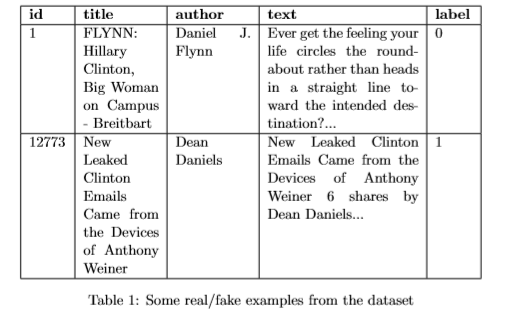



### SOLUTION and ANALYSIS 

##### 1- Reading the given dataset and create datas about news.

   First, I created a Dataframe(**full_news_DataFrame**) for the dataset using the pandas library and I shuffle the Data Frame. 
   
   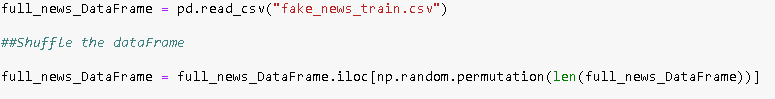
    
   Then I split the dataframe for test and train data(**News_Test, News_Train**). After splitting the data for test and train data, I divided the train data for the fake and real news(**realTrainDF, fakeTrainDF**).
   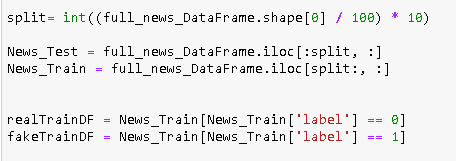

    

#### 2- Creating the dictionaries, list etc. all necessary data for my calculations.

I cretated a class for word counts of data tables.(**Word**). It holds a string (name) and an integer(count) for the frequency of the word.

I have created ***dictionary*** which is about the word frequencies, ***word list*** that contains the which words in the data,  and a ***word class list*** for my calculations. I applied this step for all the situations. 

**Situations :** For 'Title' column (Bigram and Unigram), and for 'Text' column (with and without the stop words) 


I have created two function for getting word counts of data frames: create_wordsFreq_Dict() and createFreqDataFrame()
    
    
**2.1. create_wordsFreq_Dict():**
    I used this function for the creating dictionaries about the word frequencies. Also creates the class list for 'Word' class. It take this arguments:
        
    -freq_Dict: An empty dictionary that will be filled in this function.
    -dataframe: Dataframe that holds the data about words and frequencies. Created at createFreqDataFrame() function.
    -words_list: List that contains the words of data table.
    -class_list: Empty 'Word' class list that will be filled in this function

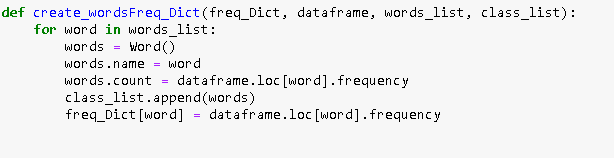

**2.2. createFreqDataFrame():**
    I used this function for create a frequency table of words of given data. Also I call create_wordsFreq_Dict() function in this function. And the necessary data that will be used for calculations created in this function. The arguments:
    
    -dataFrame: The dataframe of fake or real news.
    -column: 'Title' or 'Text'
    -range: Used for the word_vectorizer. For biagram 2, for unigram 1.
    -classList
    -freqDict
    -wordList
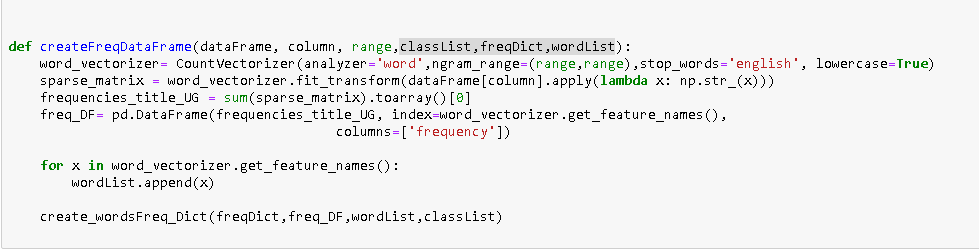



**Some examples:**

###### For the 'Title' column(Unigram):

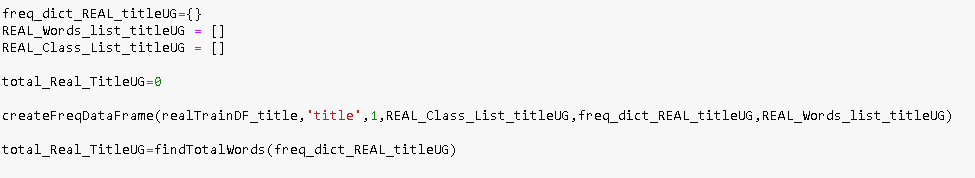

These data were created for words in the Real News DataFrame ('Title' column).

**Some part of the frequency dictionary for unigram of Real News DataFrame ('Title' column):**

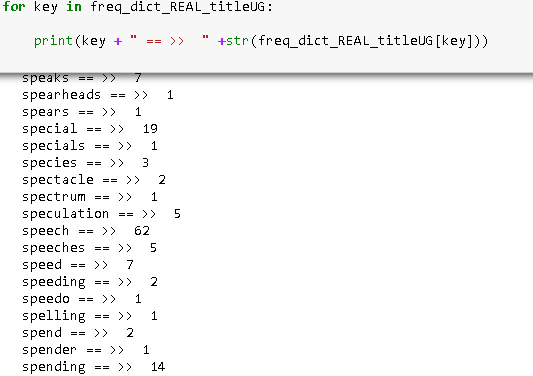

###### For the 'Title' column(Biagram):
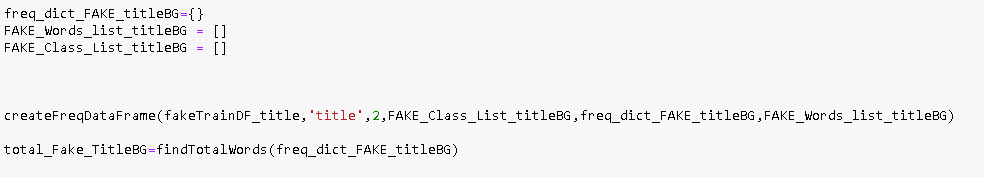

These data were created for words in the Fake News DataFrame ('Title' column).

**Some part of the frequency dictionary for biagram of Fake News DataFrame ('Title' column):**


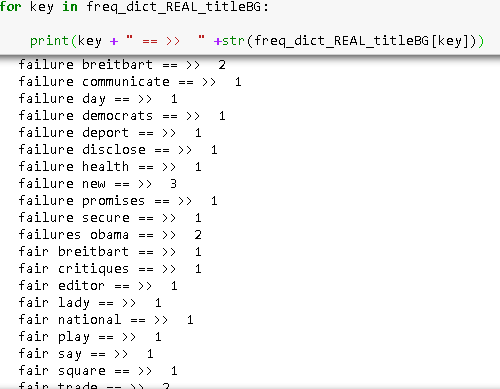


##### 3- Predicting the news and calculating the accuracy


**Without the Stop Words**

I have used three functions for the calculating accurracy:

    -predict_the_news()
    
    -findPredictValue()
    
    -findAC()

**predict_the_news() function:**

--Arguments: news_test, index, range1, real_WordsFreq_Dict, fake_WordsFreq_Dict, number_of_realNews, number_of_fakeNews,
                     total_real_words, total_fake_words, column
     
This function takes only one row Test DataFrame as argument and all the data created for the situations. **'range1'** argument is used for the biagrom or unigram on the vectorizer. The **'column** argument is for the selecting the 'Title' or 'Text' column. **'index'** argument is the select one row from the Test data table.

In this function, I create a dictionary for word frequencies of selected row for given column.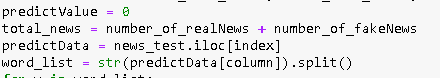

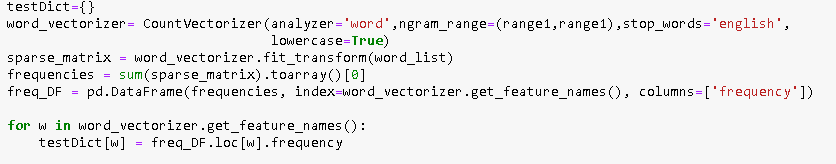


After that, with the created dictionary I am calling the **findPredictValue()** function for the findind Naive Bayes values for real and fake. Then I am choosing the bigger value of real and fake, and I am comparing my value with data's real 'Label' value. If my predict value equals to the  'Label' value, the function returns **'1'**.

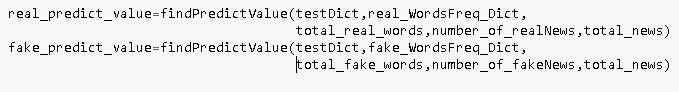

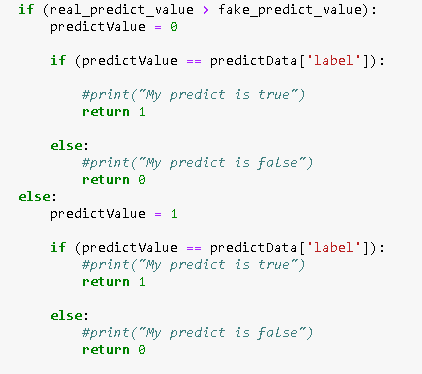


**findPredictValue() function**:

Arguments: testDict, WordsFreq_Dict, total_number_words, number_of_News,total_news

This function finds the predict value with using Naive Bayes. 

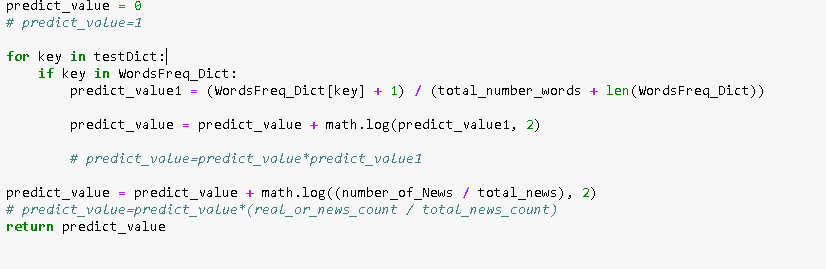

**findAC() function:**

Arguments: fakeNews_Test,range1,real_WordsFreq_Dict,fake_WordsFreq_Dict, number_of_realNews, number_of_fakeNews,
                     total_real_words, total_fake_words,column

This function finds the Accuracy by using predict_the_news() for all row of test data. There is integer value for counting the true predicts **(countx)**. If returned value of predict_the_news() is '1' I am increasing the countx. Finally I calculate the Accuracy with countx, total_real_words and total_fake_words variables.

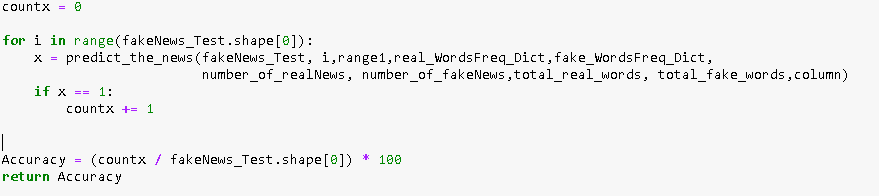

**With the Stop Words**

I have used these there functions for calculating the accuracy with the Stop words.

    -predict_the_newsSTOP()
    -findPredictValue()
    -find_AC_STOP()
  
**Note:** I used same  **findPredictValue()** for the 'With and Without the Stop Words' situation. But predict_the_newsSTOP() and  find_AC_STOP() functions are different because, in vectorizer I did not use 'stop_words' parameter.

**predict_the_newsSTOP() function:**

Same as the predict_the_news() function, but in the vectorizer  I did not use 'stop_words' parameter.


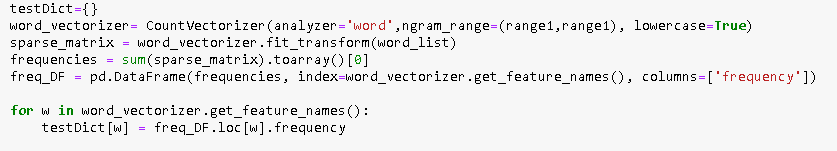


In the remaining parts of the functions, I am applying same steps in the predict_the_news().

**find_AC_STOP() function**:

Same as the predict_the_news() function, but for the data that included with 'Stop Words.'

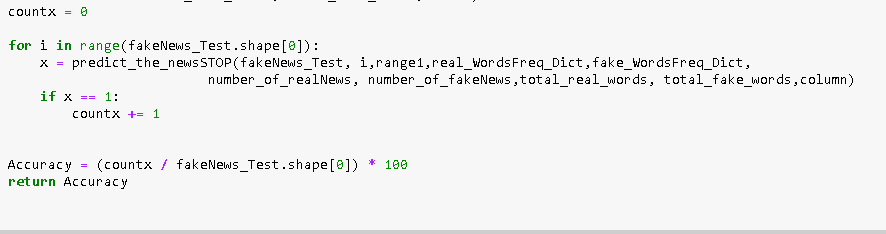

### 4 - Analysis

**The top 3 words in the 'Title' column of the news:**

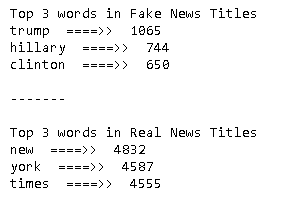

**Bag of Words:**

Some part of the frequency dictionary for biagram of Fake News DataFrame ('Title' column)

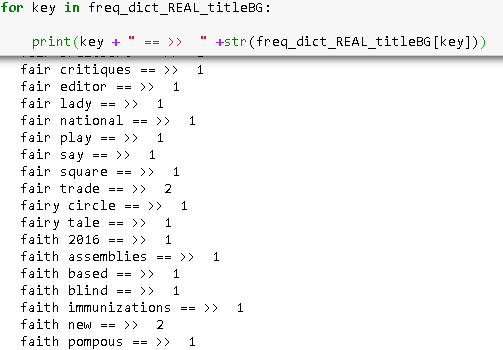


Some part of the frequency dictionary for unigram of Real News DataFrame ('Title' column):

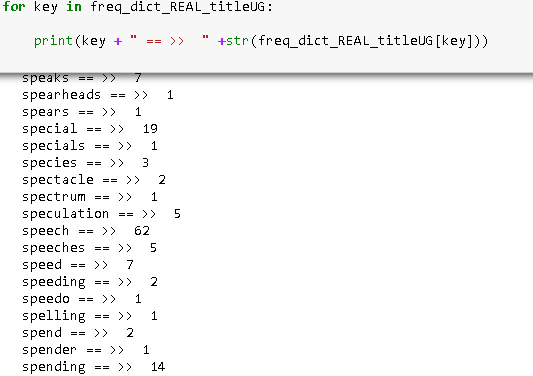

**• List the 10 words whose presence most strongly predicts that the news is real:**

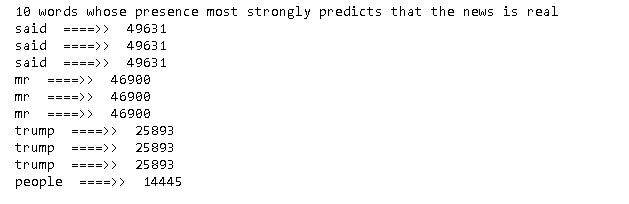

**• List the 10 words whose absence most strongly predicts that the news is real.** 

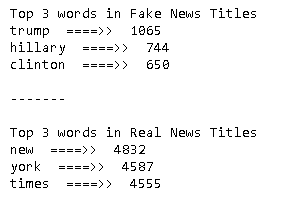

**• List the 10 words whose presence most strongly predicts that the news is fake.** 

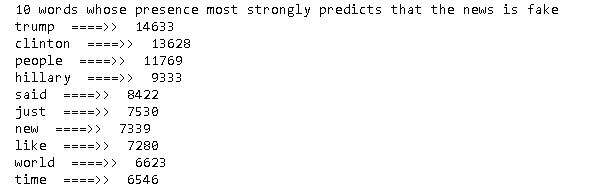

**• List the 10 words whose absence most strongly predicts that the news is fake.**

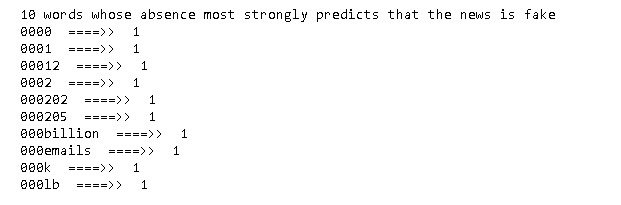

### 5.The Accuracies

I calculated the accuracies for the 'Title'(Unigram) and 'Text'(with and without the Stop Words) columns.

And my results are:

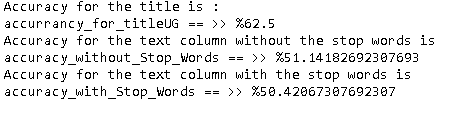

#### Result:

**1-** By looking at the Accuracy results,  Stop words have a bad effect on prediction. It reduces the accuracy. 
So I should not include the stop words for my algorithm.


**2-** And accuracy of the 'Title' column is greater than accuracy of the 'Text'. 
So, In my algorithm I should use the **'Title'** column for the prediction.